In [88]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from copy import deepcopy 

In [89]:
data = pd.read_csv("D:/MyDatasets/ChurnModelling/data.csv")
df = deepcopy(data)
data.shape, df.shape 

((10000, 14), (10000, 14))

In [90]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Observation 
| Feature Name       | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `RowNumber`        | Index of the row                                                            |
| `CustomerId`       | Unique ID for each customer                                                 |
| `Surname`          | Customer’s last name                                                        |
| `CreditScore`      | Creditworthiness score                                                      |
| `Geography`        | Country of residence                                                        |
| `Gender`           | Male or Female                                                              |
| `Age`              | Customer’s age                                                              |
| `Tenure`           | Number of years the customer has been with the bank                         |
| `Balance`          | Account balance                                                             |
| `NumOfProducts`    | Number of bank products the customer uses (1–4)                             |
| `HasCrCard`        | 1 if the customer has a credit card, 0 otherwise                            |
| `IsActiveMember`   | 1 if the customer is active, 0 if not                                       |
| `EstimatedSalary`  | Estimated annual salary                                                     |
| `Exited`           | Target variable — 1 if the customer churned, 0 if they stayed               |

In [6]:
[len(df[feature].unique()) for feature in df.columns]

[10000, 2932, 460, 3, 2, 70, 11, 6382, 4, 2, 2, 9999, 2]

In [7]:
for feature in df.columns:
    print(feature)
    print("-"*len(feature))
    print(f"samples:{df[feature].unique().tolist()[:5]}\ndtype:{df[feature].dtype}, count:{len(df[feature].unique())}, falling_category:{"numerical" if df[feature].dtype != "O" and len(df[feature].unique()) > 15 else "categorical"}")
    print("="*140)

CustomerId
----------
samples:[15634602, 15647311, 15619304, 15701354, 15737888]
dtype:int64, count:10000, falling_category:numerical
Surname
-------
samples:['Hargrave', 'Hill', 'Onio', 'Boni', 'Mitchell']
dtype:object, count:2932, falling_category:categorical
CreditScore
-----------
samples:[619, 608, 502, 699, 850]
dtype:int64, count:460, falling_category:numerical
Geography
---------
samples:['France', 'Spain', 'Germany']
dtype:object, count:3, falling_category:categorical
Gender
------
samples:['Female', 'Male']
dtype:object, count:2, falling_category:categorical
Age
---
samples:[42, 41, 39, 43, 44]
dtype:int64, count:70, falling_category:numerical
Tenure
------
samples:[2, 1, 8, 7, 4]
dtype:int64, count:11, falling_category:categorical
Balance
-------
samples:[0.0, 83807.86, 159660.8, 125510.82, 113755.78]
dtype:float64, count:6382, falling_category:numerical
NumOfProducts
-------------
samples:[1, 3, 2, 4]
dtype:int64, count:4, falling_category:categorical
HasCrCard
---------
sa

In [8]:
unnecessory_features = ["RowNumber", "CustomerId", "Surname"] 
unnecessory_features

['CustomerId', 'Surname']

In [9]:
[print(col) for col in df.columns if col not in unnecessory_features]
print()

CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited



In [10]:
numerical_features = [
    feature for feature in df.columns if df[feature].dtype != "O" and len(df[feature].unique()) > 15 and feature not in unnecessory_features
    ]
categorical_features = [
    feature for feature in df.columns if feature not in numerical_features and feature not in unnecessory_features
    ]
print(f"numerical:{numerical_features}, count:{len(numerical_features)}")
print(f"categorical:{categorical_features}, count:{len(categorical_features)}")

numerical:['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], count:4
categorical:['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], count:7


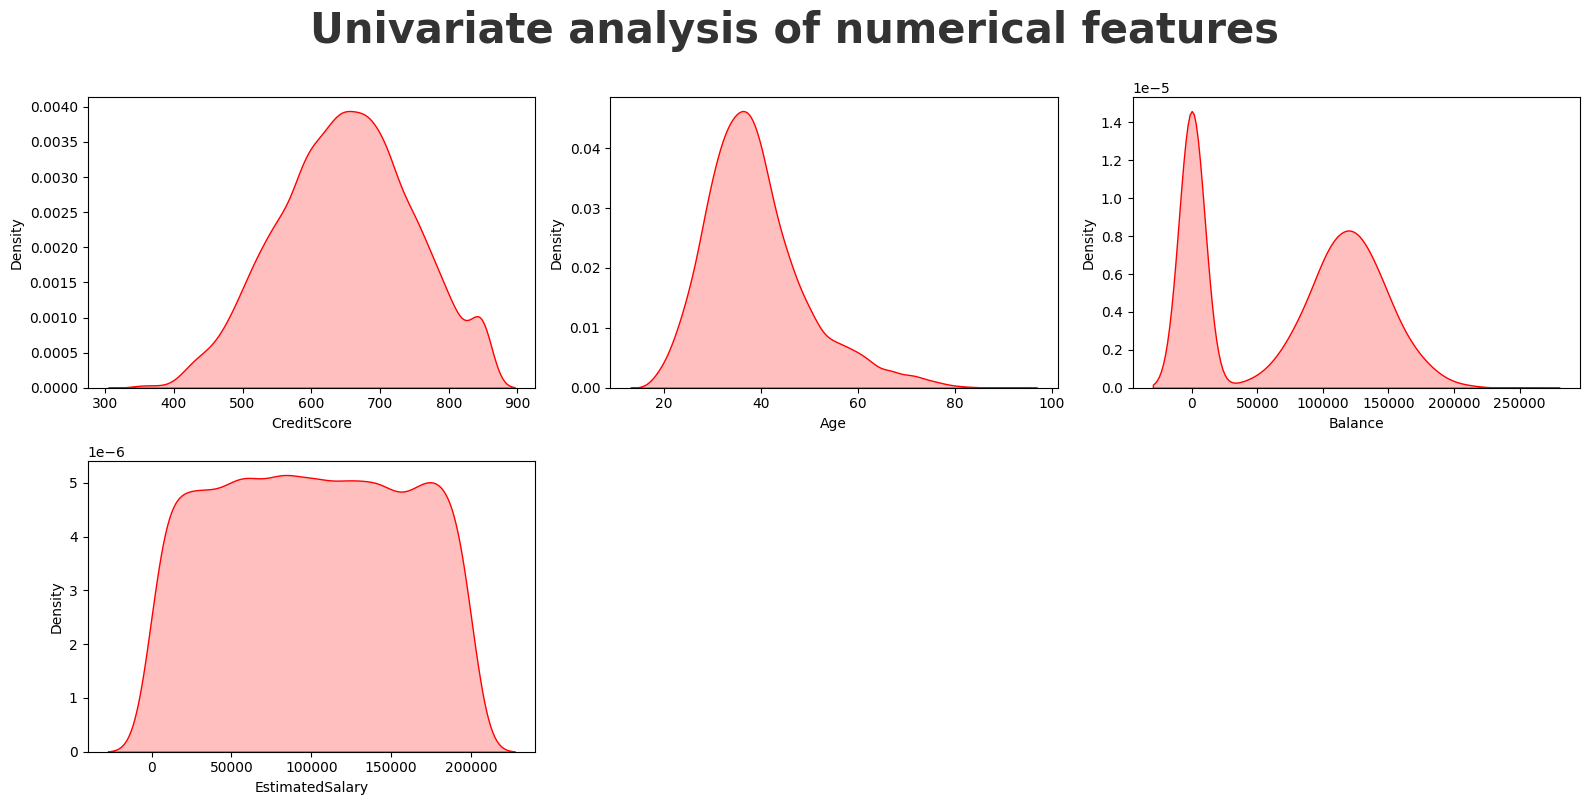

In [11]:
from math import ceil 

plt.figure(figsize=(16, 8))
plt.suptitle("Univariate analysis of numerical features", fontsize=30, fontweight='bold', alpha=0.8, y=1.)
for index, feature in enumerate(numerical_features):
    plt.subplot(ceil(len(numerical_features)/3), 3, index+1)
    sns.kdeplot(df, x=feature, fill=True, color="r")
    plt.xlabel(feature)
    plt.tight_layout()

# Observation 
- CreditScore: Maximum account holders are having credit score of range from 500 to 800

- Age: Maximum account holders are in between age of 20 to 50 

- Balance: Account holders can be grouped on basis of account balance below 50,000 and greater than 50,000. Account holders having less than 50,000 of balance are more in comparision of account holders having balance more than 50,000.

- EstimatedSalary: Account holder are having estimated salary of range from 0 to 2,00,000.

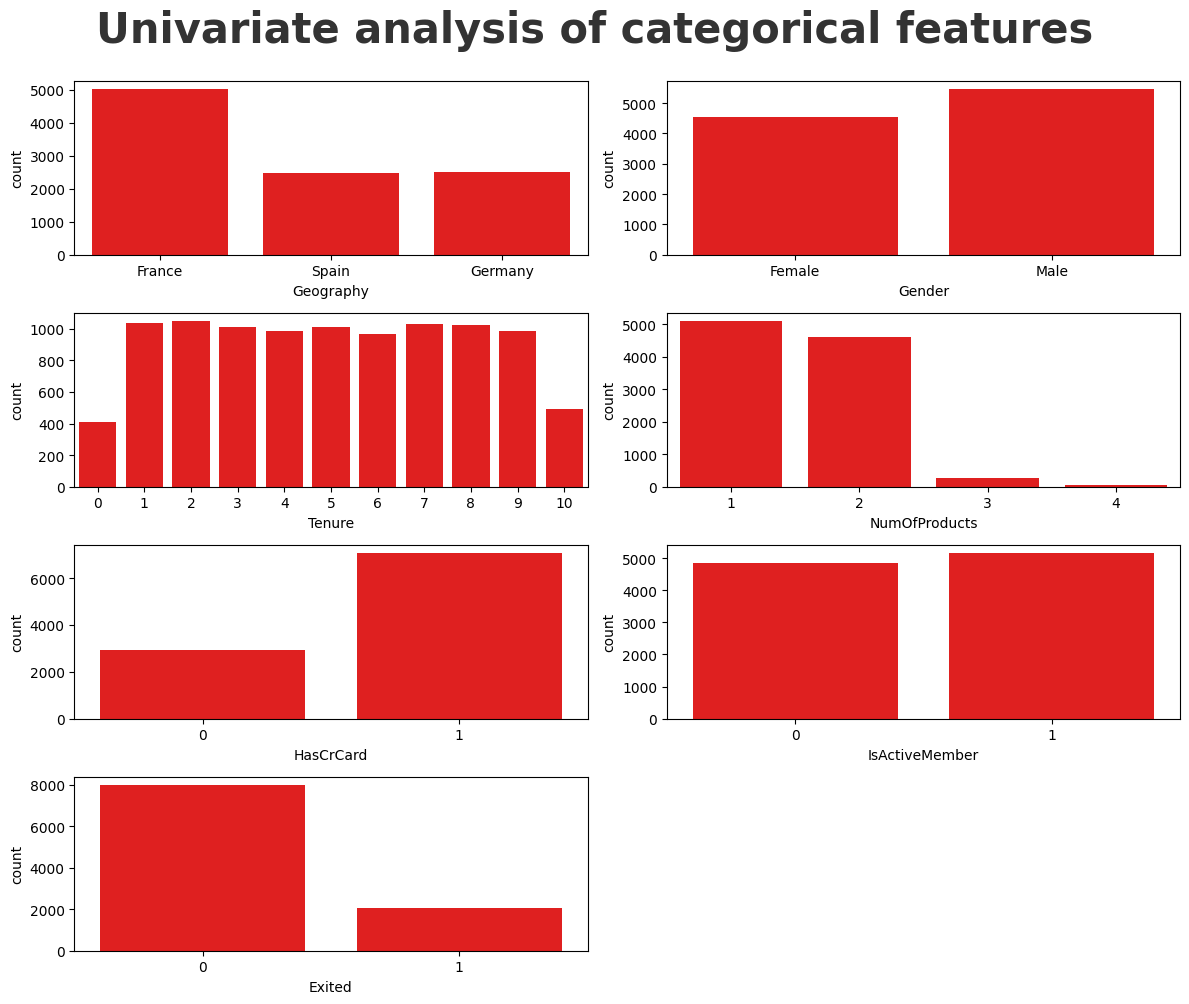

In [57]:
plt.figure(figsize=(12, 10))
plt.suptitle("Univariate analysis of categorical features", fontsize=30, fontweight='bold', alpha=0.8, y=1.)
for index, feature in enumerate(categorical_features):
    plt.subplot(ceil(len(categorical_features)/2), 2, index+1)
    sns.countplot(df, x=feature, color="r")
    plt.xlabel(feature)
    plt.tight_layout()

# Observation 
- Geography: Maximum account holders belongs to France, where Germany and Spain have approximately equal number of account holders.

- Gender: Male account holders are more as compare to female account holders. 

- Tenure: Frequency of account holder who have been with bank for years from 1 to 9 are almost equal in each category where less than 1 year and more than 9 years are less in frequency. 

- NumOfProducts: Frequency of account holder using single a product or two products at the same time are a lot higer, where customers using three and four products at the same time are very less in frequency.

- HasCrCard: A great lead in account holders with holding credit cards but still a lot of account holders are not having credit cards. 

- IsActiveMember: Approximately 50% of account holders are inactive.

- Exited: Some account holders has churned.

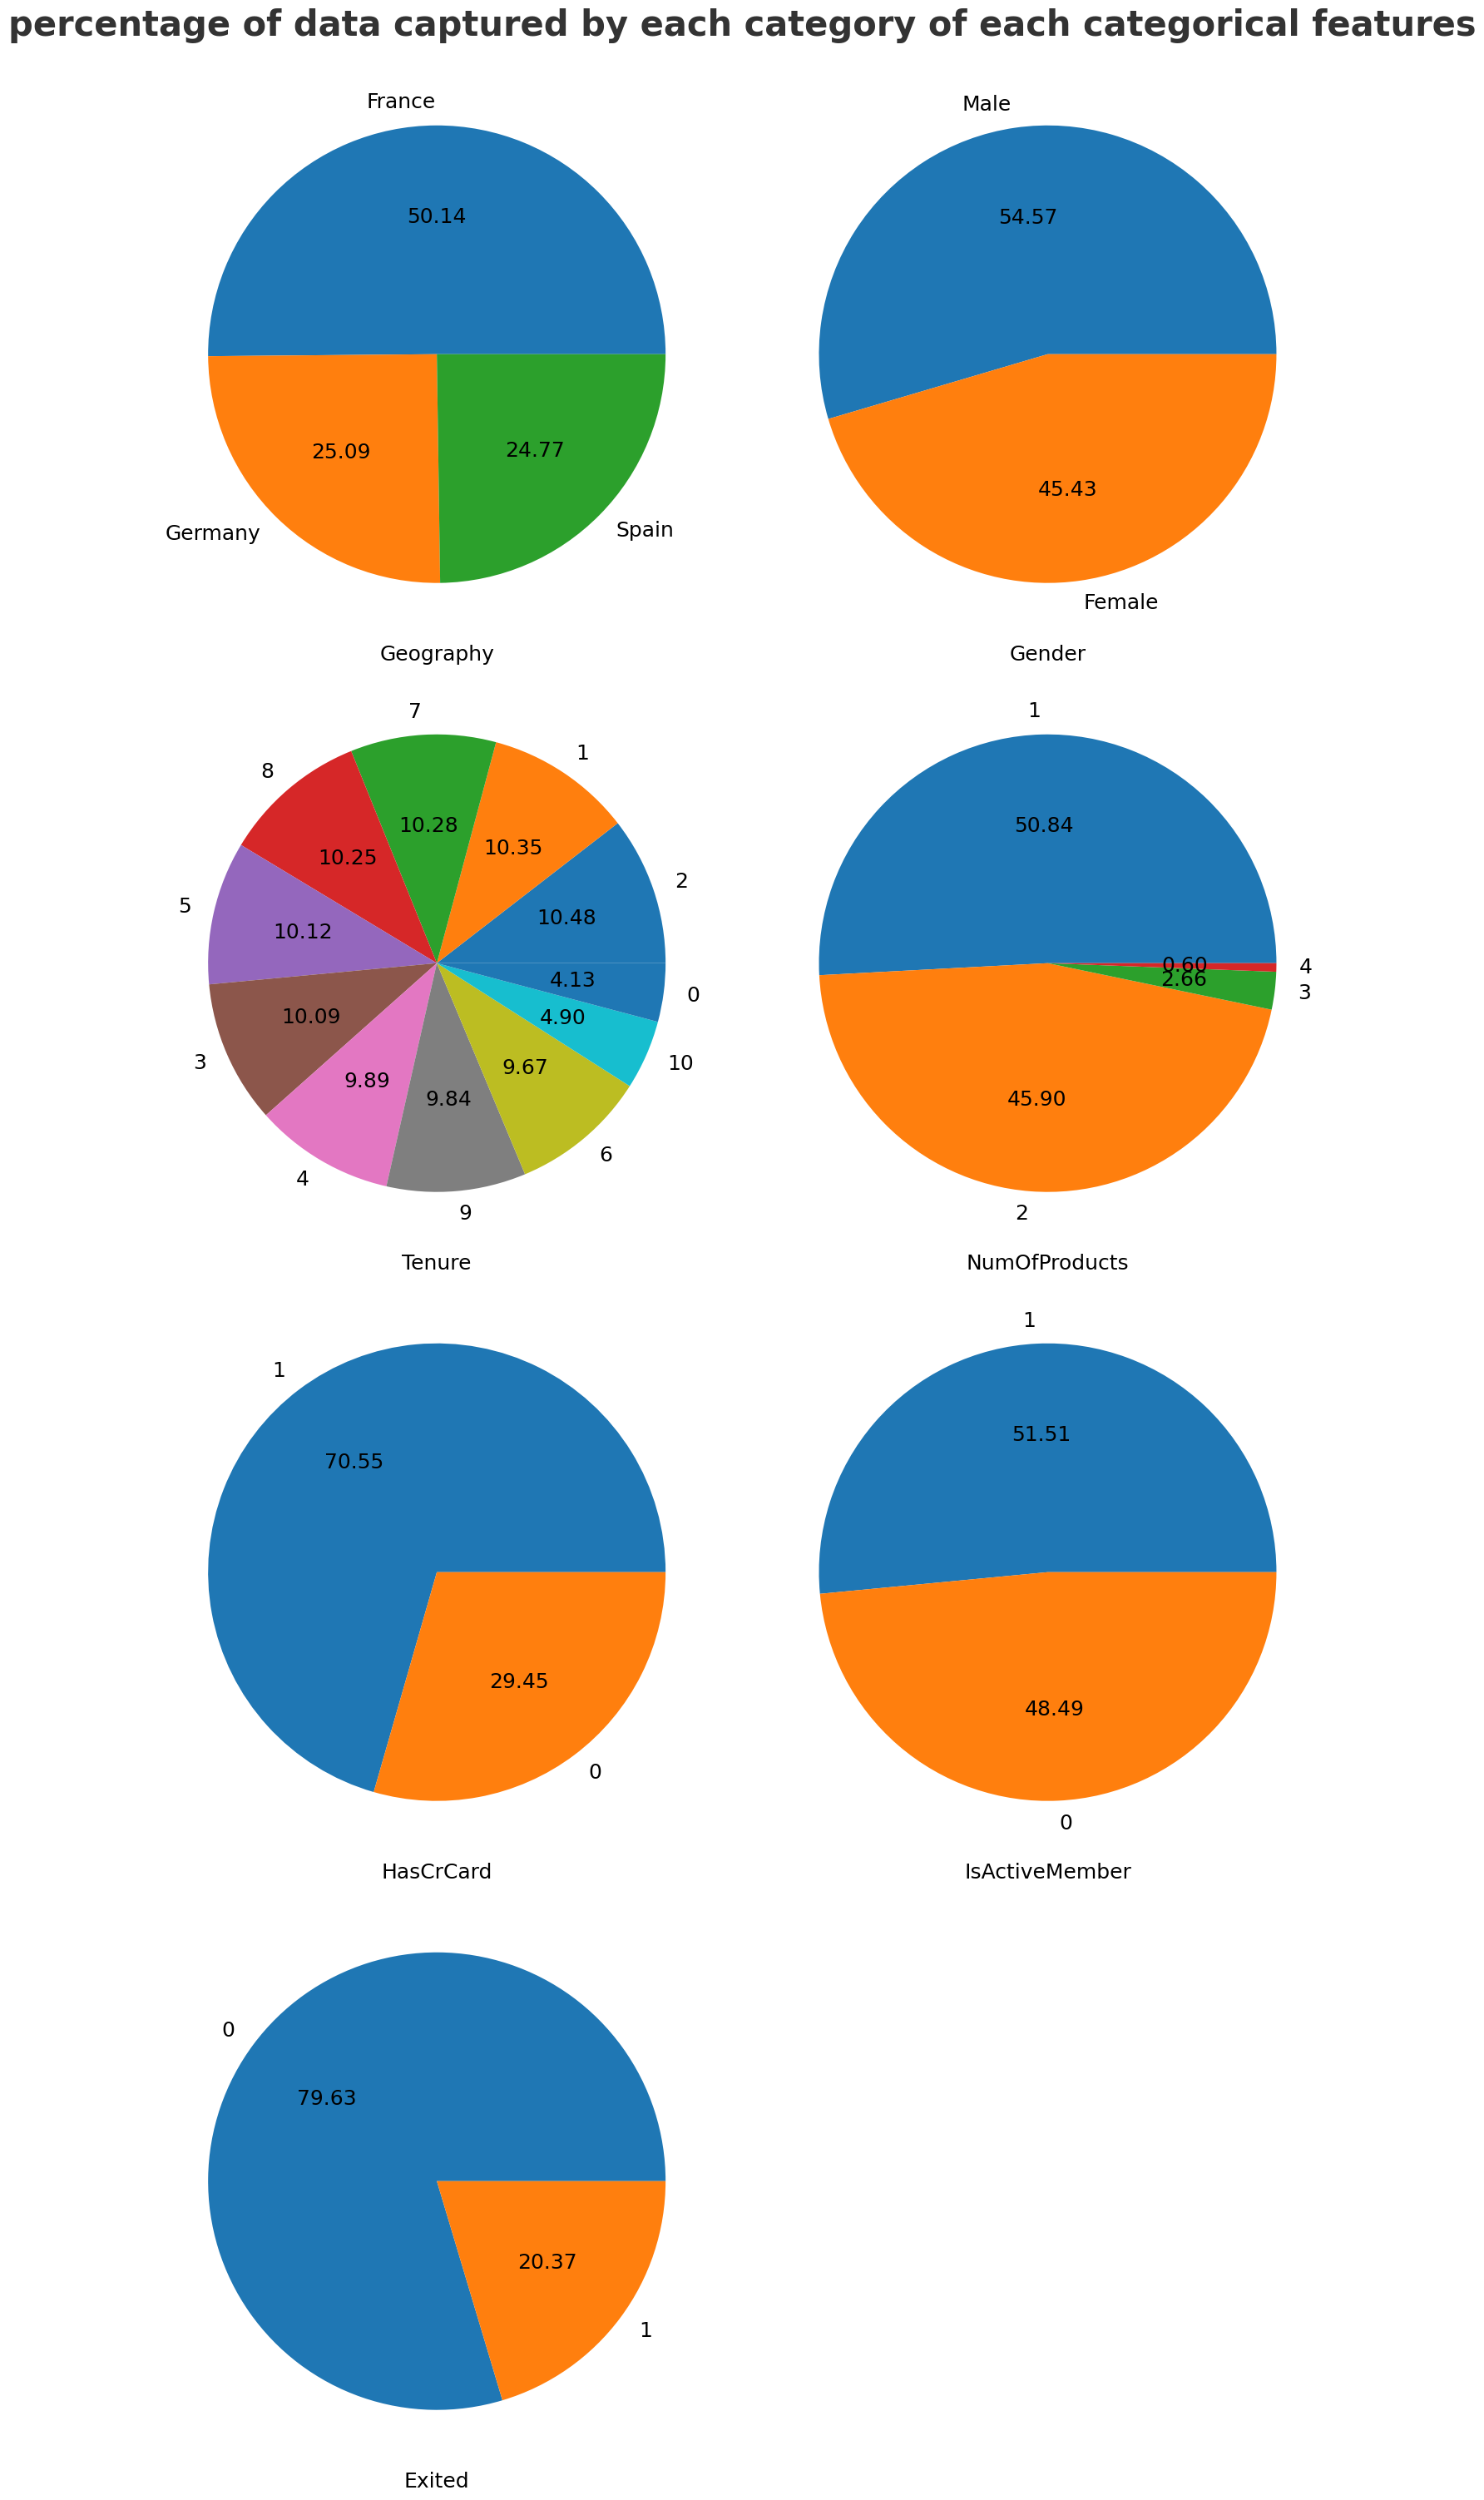

In [33]:
plt.figure(figsize=(15, 30))
plt.suptitle("percentage of data captured by each category of each categorical features", fontsize=30, fontweight='bold', alpha=0.8, y=1.)
for index, feature in enumerate(categorical_features):
    plt.subplot(ceil(len(categorical_features)/2), 2, index+1)
    plt.pie(df[feature].value_counts().values, labels=df[feature].value_counts().index, autopct="%1.2f", textprops={'fontsize': 18})
    plt.xlabel(feature, fontdict={'fontsize': 18})
    plt.tight_layout()

In [55]:
# for feature in categorical_features:
#     print("#### "+feature)
#     for category in df[feature].value_counts().index:
#         print(f"- {category} having {(df[feature].value_counts().to_dict()[category])/sum(df[feature].value_counts().values)*100:.2f}% of data")
#     print()

# Observation
#### Geography
- France having 50.14% of data
- Germany having 25.09% of data
- Spain having 24.77% of data

#### Gender
- Male having 54.57% of data
- Female having 45.43% of data

#### Tenure
- 2 having 10.48% of data
- 1 having 10.35% of data
- 7 having 10.28% of data
- 8 having 10.25% of data
- 5 having 10.12% of data
- 3 having 10.09% of data
- 4 having 9.89% of data
- 9 having 9.84% of data
- 6 having 9.67% of data
- 10 having 4.90% of data
- 0 having 4.13% of data

#### NumOfProducts
- 1 having 50.84% of data
- 2 having 45.90% of data
- 3 having 2.66% of data
- 4 having 0.60% of data

#### HasCrCard
- 1 having 70.55% of data
- 0 having 29.45% of data

#### IsActiveMember
- 1 having 51.51% of data
- 0 having 48.49% of data

#### Exited
- 0 having 79.63% of data
- 1 having 20.37% of data

In [56]:
target = "Exited"
target

'Exited'

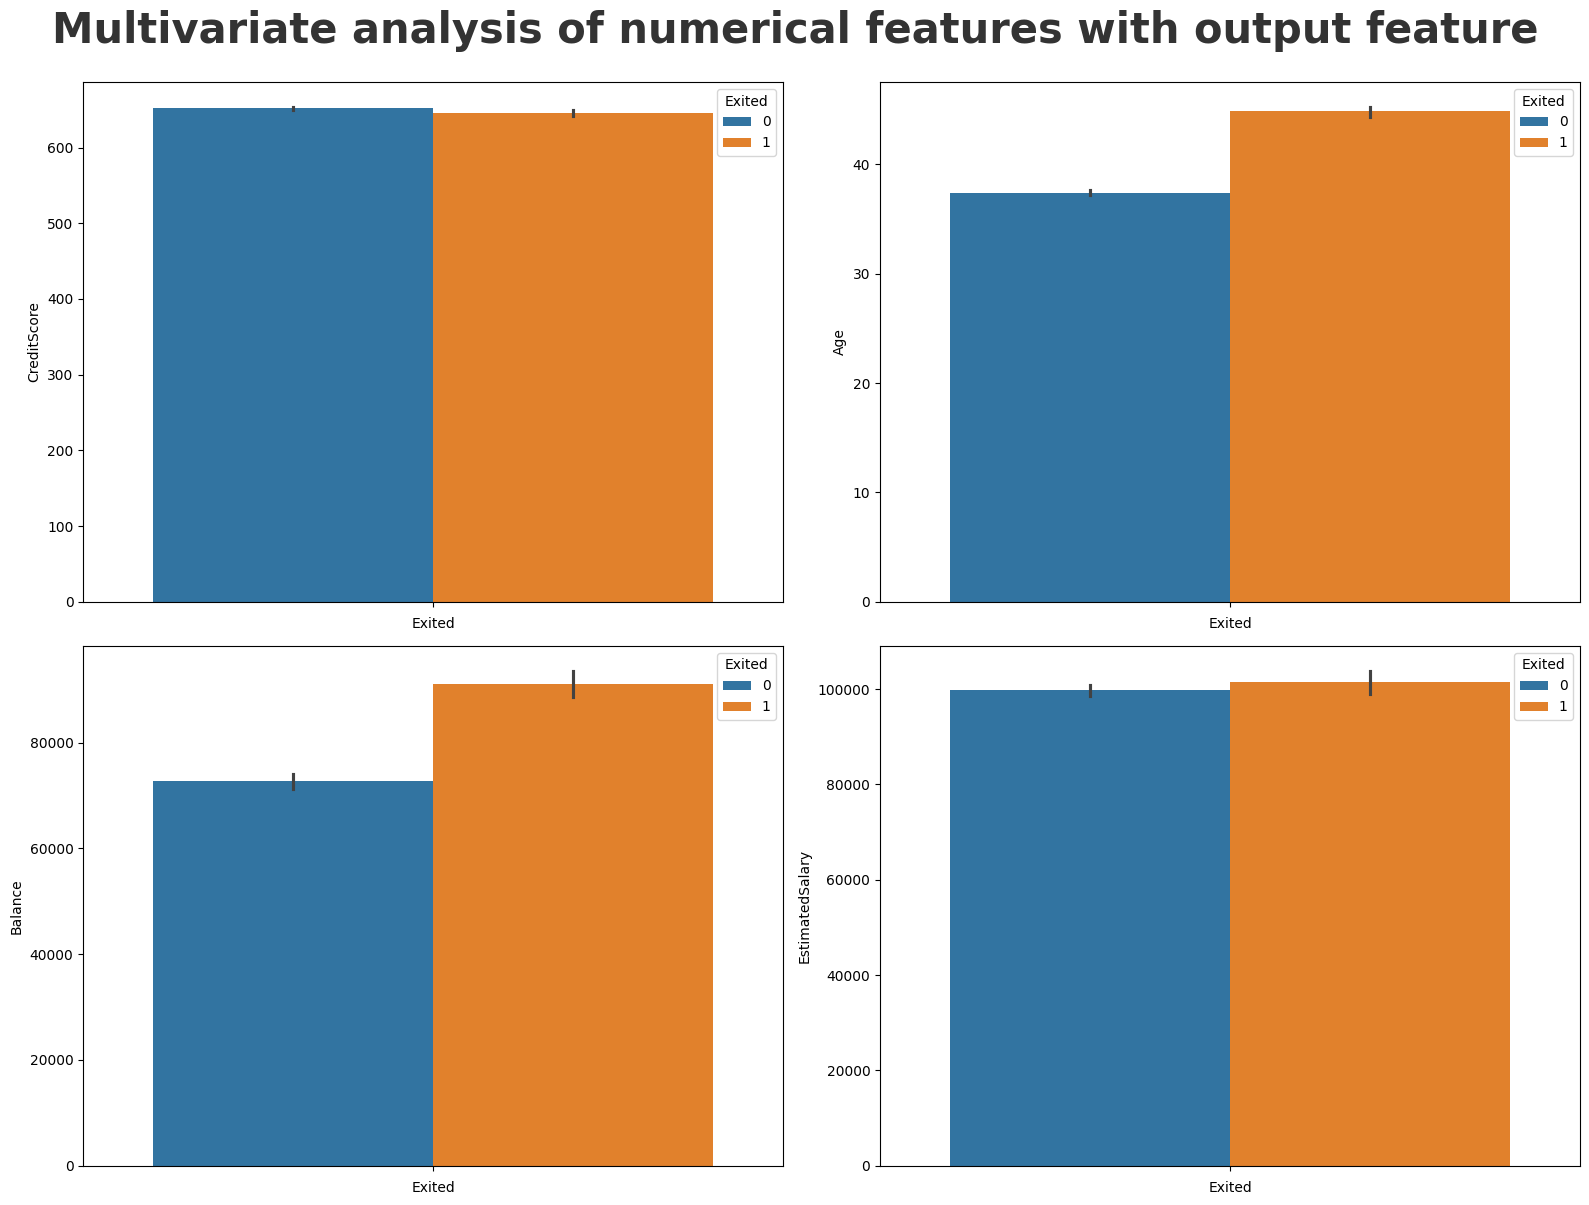

In [68]:
plt.figure(figsize=(16, 12))
plt.suptitle("Multivariate analysis of numerical features with output feature", fontsize=30, fontweight='bold', alpha=0.8, y=1.)
for index, feature in enumerate(numerical_features):
    plt.subplot(ceil(len(numerical_features)/2), 2, index+1)
    sns.barplot(df, y=feature, hue=target)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.tight_layout()

# Observation
- Age: After age of 35 customers are usually churn.

In [ ]:
categorical_features.remove(target)

In [74]:
categorical_features

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

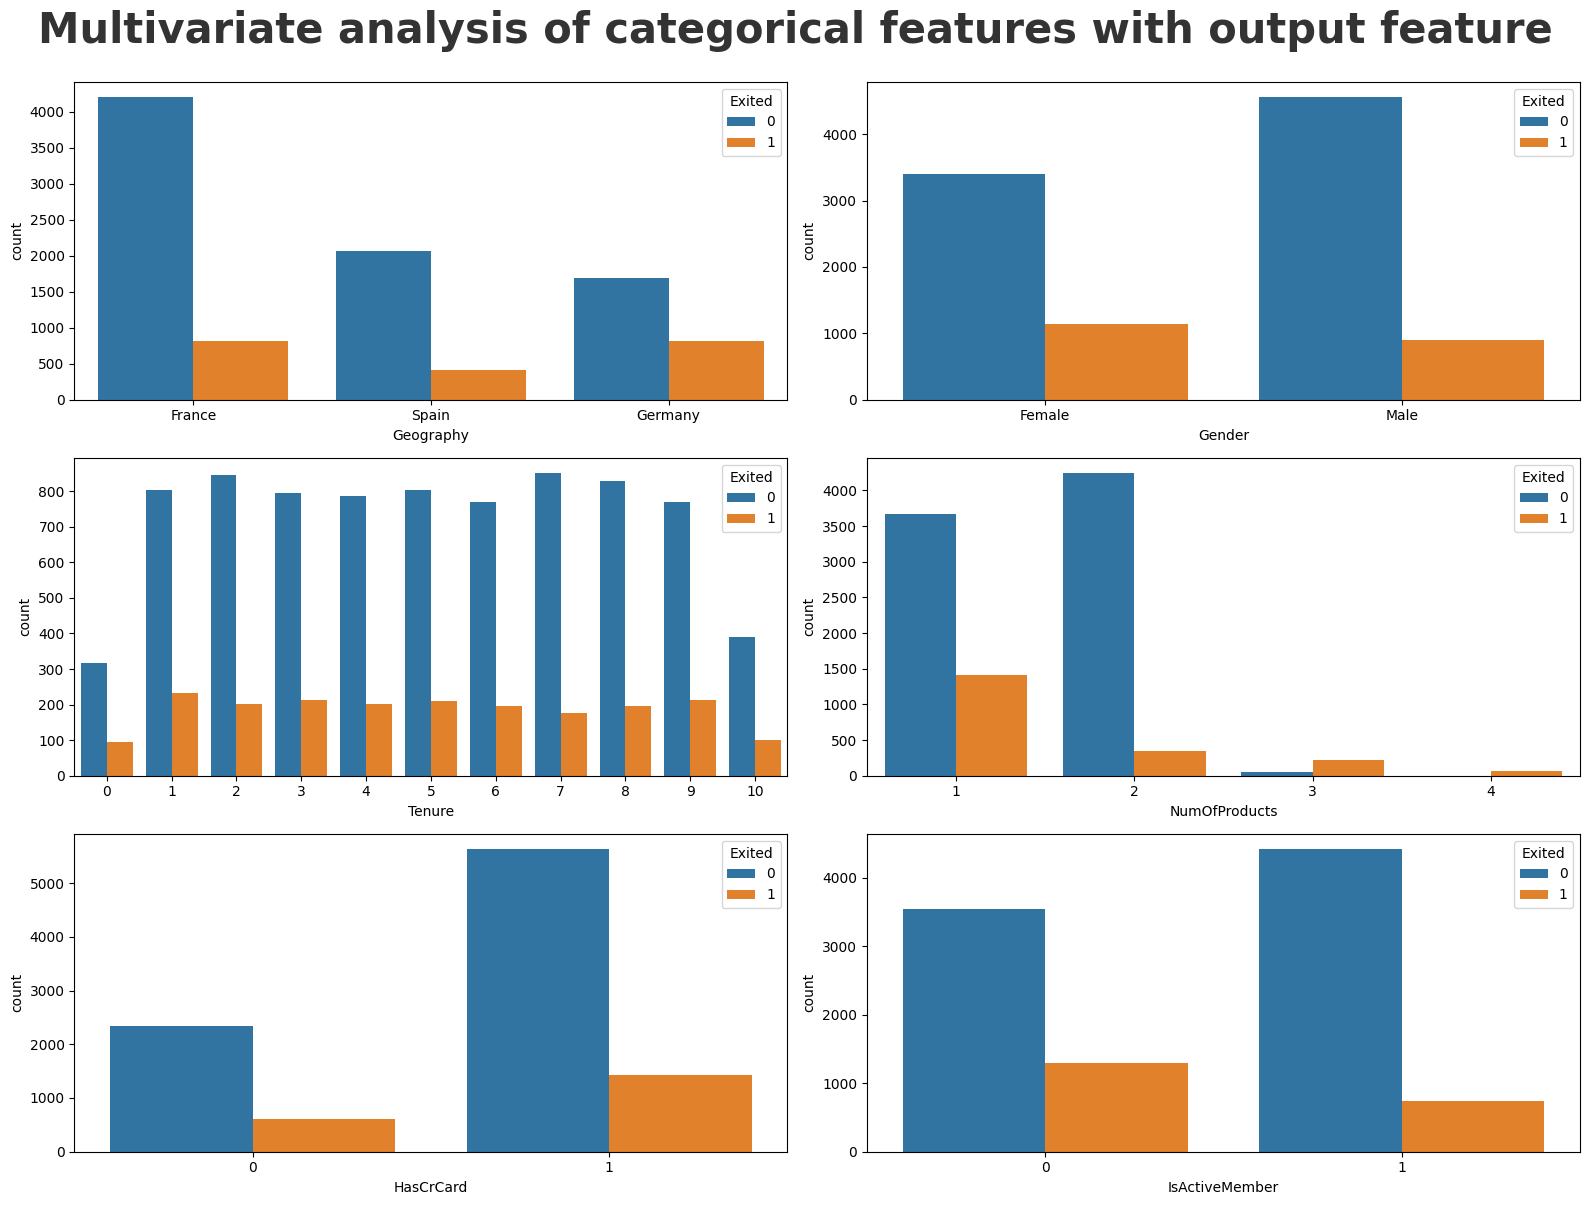

In [72]:
plt.figure(figsize=(16, 12))
plt.suptitle("Multivariate analysis of categorical features with output feature", fontsize=30, fontweight='bold', alpha=0.8, y=1.)
for index, feature in enumerate(categorical_features):
    plt.subplot(ceil(len(categorical_features)/2), 2, index+1)
    sns.countplot(df, x=feature, hue=target)
    plt.tight_layout()

# Observation 
- Geography: Consumers from Germany is very minimum but they have churned a lot as compare to other region. 

- NumOfProducts: Consumers are consuming only a single product at a time churns a lot. 

- HasCrCard: Account holders with credit cards chuns more but are also higer in frequency as compare to non credit card holder. 

- IsActiveMember: Accounts which are not active member are more likely to churn. 

In [75]:
df[numerical_features].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


<Axes: >

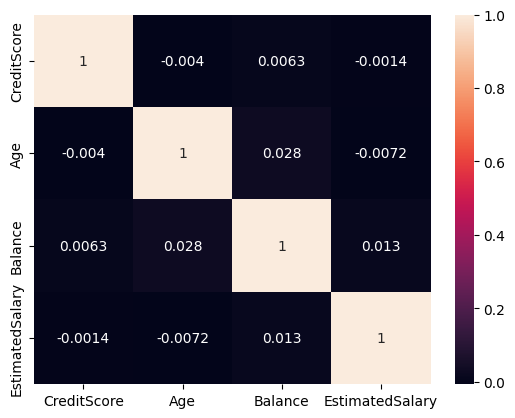

In [81]:
sns.heatmap(df[numerical_features].corr(), annot=True)

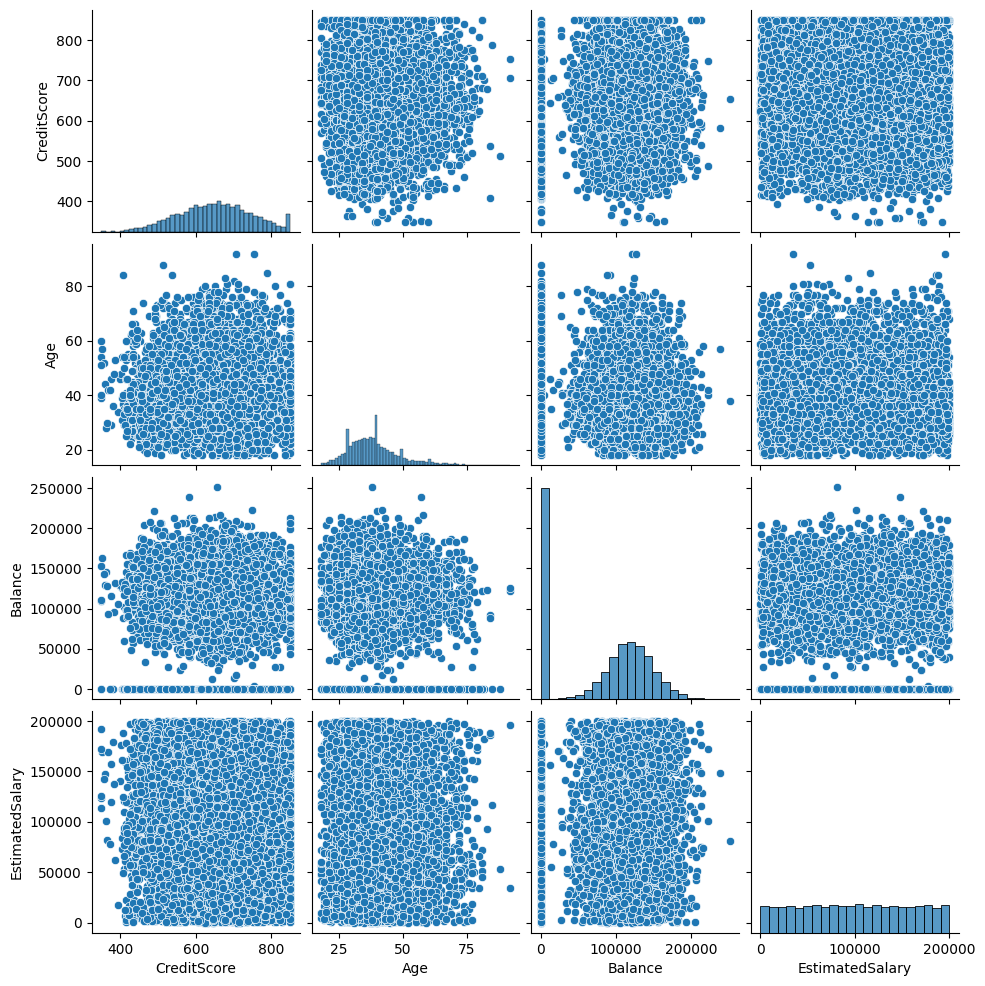

In [87]:
sns.pairplot(df[numerical_features])